## Analyzing Top 100 movies from IMDb based on Genre

 We have many movies releasing every day . But we don't know which movies are good. So to know which movies are good we depend on rating .IMDb is one such site which provides ratings on movies based from users . IMDb has selected all time top-100 movies . So the objective here is to analyze which type of genres are present in all time top-100 and to find out which genre has how many number of movies.

## Procedure

1. Web Scrape IMDb site to get information about all time top-100 movies.
1. Compare the movies based on genres.
1. Genrate bar graph indicating which genre has how many number of movies.
1. Generate pie-chart by using information that we got by scraping the site.

## Libraries Required

1. BeautifulSoup:Beautiful Soup is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree.
1. Requests :Requests is a Python module you can use to send all kinds of HTTP requests.
1. Pickle : Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk.
1. matplotlib.pyplot : Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.

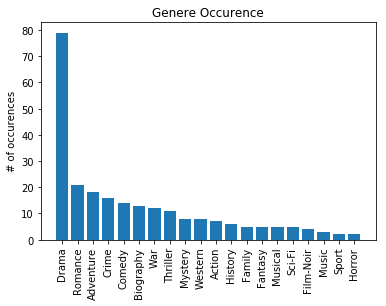

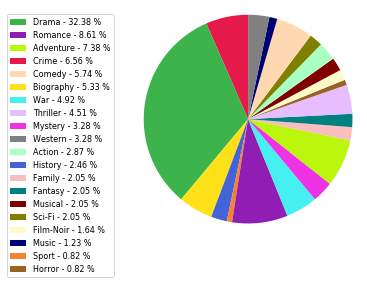

In [29]:
from bs4 import BeautifulSoup
import requests
import pickle
def film_list():
    getPage = requests.get('https://www.imdb.com/list/ls055592025/')
    getPage.raise_for_status()
    Page = BeautifulSoup(getPage.text, 'html.parser')
    movie_details = {
        "data": []
    }
    MoviesList = Page.find_all(class_="mode-detail")
    for list in MoviesList:
        name = list.find(class_="lister-item-header").text
       
        Movie_genre = list.find('span',class_="genre").text

        rating = list.find(class_="ipl-rating-star__rating").text

        details = {
                    "Name" : name,
                    "Genre" : Movie_genre,
                    "Rating" : rating,
                }
        movie_details['data'].append(details)
       
        
    with open('movie_details_pickle.pkl', 'wb') as f:
        pickle.dump(movie_details,f,protocol=pickle.HIGHEST_PROTOCOL) 
        
    return movie_details
        
movie_details = film_list()

gener_count = {}


for gener in movie_details['data'] :
    gener_list = gener['Genre'].split(',')
    for index in range(len(gener_list)):
        gener_list[index] = gener_list[index].strip()
        gener_list[index] = gener_list[index].rstrip('\n')
        
    for gnr in gener_list:
        if gnr in list(gener_count.keys()):
            gener_count[gnr] = gener_count[gnr] + 1
        else:
            gener_count[gnr] = 1
            
            
import matplotlib.pyplot as plt

NUM_VALUES = 20

heights = list(gener_count.values())

heights.sort(reverse = True)



plt.bar(range(NUM_VALUES), heights[:NUM_VALUES])

plt.title('Genere Occurence')
plt.ylabel('# of occurences')
keys = list(gener_count.keys())

keys.sort(reverse = True, key = lambda x:gener_count[x])




plt.xticks(range(NUM_VALUES), keys[:NUM_VALUES],
          rotation = 90)
                                                     
plt.show()
    
    
    

    
import matplotlib.pyplot as plt

labels = list(gener_count.keys())
sizes = list(gener_count.values())

explode = []

for ex in range(len(gener_count.values())):
    explode.append(0)

x = np.char.array(labels)
y = np.array(sizes)
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

percent = 100.*y/y.sum()
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
cond = True
if cond:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.savefig('piechart.png', bbox_inches='tight')




## Conclusion

 This application provides solution to find out which genre has highest number of movies in all time top-100 by IMDb.